In [74]:
import dash
from dash.dependencies import Input, Output, Event
import dash_core_components as dcc
import dash_html_components as html
import plotly

import flask
import glob

import plotly.plotly as py
import plotly.graph_objs as go
import sys
import os
import csv
import pandas as pd
import base64

import UD as UD

path = '/Users/andiedonovan/myProjects/Youtube_Python_Project/AndiesBranch/'



In [75]:
Ratios = UD.Ratios
all_models = UD.all_models
model_options = ['label_lr', 'label_mnb', 'label_svm', 'label_rf', 'label_knn']

In [76]:
Ratios

,label_lr,label_mnb,label_svm,label_rf,label_knn
0,48,49,100,47,32
1,39,42,0,34,30
2,13,9,0,19,38


In [77]:
df = UD.df

In [78]:
df.head(5)

,comment,label,com_token,com_remv,com_lemma,com_stem,com_stem_str
0,Roses are Red,-1.0,"[roses, are, red]","[roses, red]","[rose, red]","[rose, red]","rose, red"
1,Violets are Blue,0.0,"[violets, are, blue]","[violets, blue]","[violet, blue]","[violet, blue]","violet, blue"
2,I was so happy,1.0,"[i, was, so, happy]",[happy],[happy],[happi],happi
3,And you shouldve been too,1.0,"[and, you, shouldve, been, too]",[shouldve],[shouldve],[shouldv],shouldv
4,When a pro fifa player plays against the lowes...,0.0,"[when, a, pro, fifa, player, plays, against, t...","[pro, fifa, player, plays, lowest, difficulty,...","[pro, fifa, player, play, lowest, difficulty, ...","[pro, fifa, player, play, lowest, difficulti, ...","pro, fifa, player, play, lowest, difficulti, bot"


In [79]:
import matplotlib.pyplot as plt
stop_remv_df = df["com_remv"].apply(', '.join)
stop_remv_df = stop_remv_df.str.replace(",","").astype(str)
most_freq = pd.Series(' '.join(stop_remv_df).lower().split()).value_counts()[:10]

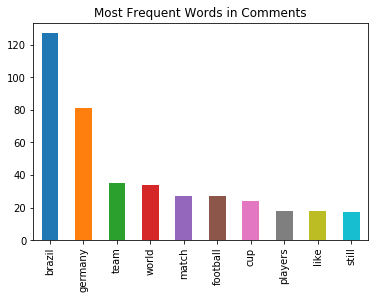

In [80]:
most_freq
most_freq.plot(kind='bar', title= "Most Frequent Words in Comments")

In [81]:
WordCounts= pd.DataFrame({'Word':most_freq.index, 'Count':most_freq.values})

In [120]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np
df["com_remv"] = df["com_remv"].apply(', '.join)
df["com_remv"] = df["com_remv"].str.replace(",","").astype(str)

In [121]:
df.head(5)

,comment,label,com_token,com_remv,com_lemma,com_stem,com_stem_str
0,Roses are Red,-1.0,"[roses, are, red]",roses red,"[rose, red]","[rose, red]","rose, red"
1,Violets are Blue,0.0,"[violets, are, blue]",violets blue,"[violet, blue]","[violet, blue]","violet, blue"
2,I was so happy,1.0,"[i, was, so, happy]",happy,[happy],[happi],happi
3,And you shouldve been too,1.0,"[and, you, shouldve, been, too]",shouldve,[shouldve],[shouldv],shouldv
4,When a pro fifa player plays against the lowes...,0.0,"[when, a, pro, fifa, player, plays, against, t...",pro fifa player plays lowest difficulty bots,"[pro, fifa, player, play, lowest, difficulty, ...","[pro, fifa, player, play, lowest, difficulti, ...","pro, fifa, player, play, lowest, difficulti, bot"


In [127]:
positive = df[df["label"]==1]
positive = positive["com_remv"]
negative = df[df["label"]==-1]
negative = negative["com_remv"]
neutral = df[df["label"]==0]
neutral = neutral["com_remv"]

In [129]:
most_freq_pos = pd.Series(' '.join(positive).lower().split()).value_counts()[:10]
most_freq_neg = pd.Series(' '.join(negative).lower().split()).value_counts()[:10]
most_freq_neu = pd.Series(' '.join(neutral).lower().split()).value_counts()[:10]

In [130]:
#most_freq_pos.index

In [131]:
trace0 = go.Bar(
    x = most_freq_pos.index,
    y = most_freq_pos.values,
    marker=dict(color='#835AF1')
)
trace1 = go.Bar(
    x = most_freq_neu.index,
    y = most_freq_neu.values,
    marker=dict(color='#7FA6EE')
)
trace2 = go.Bar(
    x = most_freq_neg.index,
    y = most_freq_neg.values,
    marker=dict(color='#B8F7D4')
)
data = [trace0, trace1, trace2]

updatemenus = list([
    dict(type="buttons",
         active=-1,
         buttons=list([   
            dict(label = 'Positive',
                 method = 'update',
                 args = [{'visible': [True, False, False]},
                         {'title': 'Positive Comments'}]),
            dict(label = 'Neutral',
                 method = 'update',
                 args = [{'visible': [False, True, False]},
                         {'title': 'Neutral Comments'}]),
            dict(label = 'Negative',
                 method = 'update',
                 args = [{'visible': [False, False, True]},
                         {'title': 'Negative Comments'}]),
            dict(label = 'All',
                 method = 'update',
                 args = [{'visible': [True, True, True, True]},
                         {'title': 'All Comments'}])
         ]),
        )
])
                

layout = dict(title='Word Frequency by Sentiment', showlegend=False,
              updatemenus=updatemenus)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='relayout_option')